# PCA - Analiza głównych składowych

Zbiór danych: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset

Cel biznesowy: stowrzyć grupy pacjentów, w celu optymalizacji obsługi

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Wczytanie danych
df = pd.read_csv(r"C:\dane\PATRYK\kurs\ml_course\3_zaawansowany_ML\7_unsupervised_learning\data\Train.csv")
df_numerical = df.select_dtypes(exclude = 'object')
df_scaled  = StandardScaler().fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled, columns = df_numerical.columns)
df_scaled

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,0.275,1.035,1.037,0.887,1.701,-1.802,-1.310,0.821,-1.685,-1.037,0.039,0.332,1.727
1,0.469,0.539,1.207,0.247,-0.447,-0.682,-0.988,0.532,-1.579,1.495,0.782,-0.586,1.143
2,-1.361,-1.772,-1.068,-1.221,0.929,-1.034,-1.077,0.527,-0.648,1.454,1.209,-0.162,0.803
3,0.052,-1.253,0.785,-1.364,0.592,0.569,0.187,2.282,-0.738,-0.303,0.880,-0.924,-0.072
4,-0.520,0.108,0.085,0.465,1.025,-1.121,-0.800,0.381,-0.923,-0.556,1.533,-0.598,1.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.749,1.197,-1.218,1.891,-0.800,1.468,0.912,-1.327,-0.515,1.012,1.678,0.908,-1.531
2996,-0.554,1.568,-1.495,2.140,-1.398,1.924,1.172,-0.987,0.418,-1.180,-1.354,0.755,-1.677
2997,0.997,1.040,0.188,0.393,-0.884,-1.276,-1.310,-0.506,-1.169,0.849,0.025,-1.081,1.532
2998,-0.678,-2.363,-1.460,-2.254,-0.162,1.175,0.828,-0.257,0.425,0.945,-0.201,-0.260,-1.142


In [7]:
# zmienna y
y = ['Age (years)']

In [8]:
# Zmienne x
x= list(df_scaled.columns)
del x[x.index(y[0])]

In [9]:
x

['Height (cm)',
 'Weight (kg)',
 'Cholesterol Level (mg/dL)',
 'BMI',
 'Blood Glucose Level (mg/dL)',
 'Bone Density (g/cm²)',
 'Vision Sharpness',
 'Hearing Ability (dB)',
 'Cognitive Function',
 'Stress Levels',
 'Pollution Exposure',
 'Sun Exposure']

In [10]:
# model PCA
pca  = PCA().fit(df_scaled[x])

In [11]:
# Współczynniki
pca.components_

array([[-5.79767563e-03, -1.77587367e-02, -3.03753720e-01,
        -1.71116671e-02, -2.98323108e-01,  5.04042317e-01,
         4.97168924e-01, -4.41535641e-01,  3.48172043e-01,
        -2.25760261e-02,  5.00461498e-03, -1.21405480e-02],
       [ 1.70449917e-01,  7.25842123e-01,  4.70217099e-02,
         6.61130491e-01,  7.37191233e-04,  2.15189328e-02,
         2.72416406e-02, -1.58296701e-02,  2.52450523e-02,
         2.51852584e-02, -3.87991130e-02, -2.37106826e-02],
       [ 8.74816081e-01,  1.59599409e-01, -1.03446450e-01,
        -3.98802790e-01,  4.30277862e-02, -3.20219831e-02,
        -1.98613811e-02,  1.84332774e-02,  4.44950391e-02,
        -8.88522456e-02, -1.61191874e-01,  3.40751513e-03],
       [ 1.35693360e-01,  3.88368124e-02, -4.21587985e-02,
        -4.52660023e-02, -6.79160422e-02,  6.67789948e-03,
         5.84225893e-03,  3.67910346e-03, -5.53541854e-02,
         6.21268214e-01,  5.47678720e-01,  5.31561405e-01],
       [-5.10660716e-02,  9.63482722e-03,  4.8390290

In [12]:
# wyjaśniona wariancja
pca.explained_variance_

array([3.22599458, 1.82809086, 1.18660206, 1.04416264, 0.98703478,
       0.97279877, 0.80689299, 0.76745323, 0.63144143, 0.39701033,
       0.1521388 , 0.00438086])

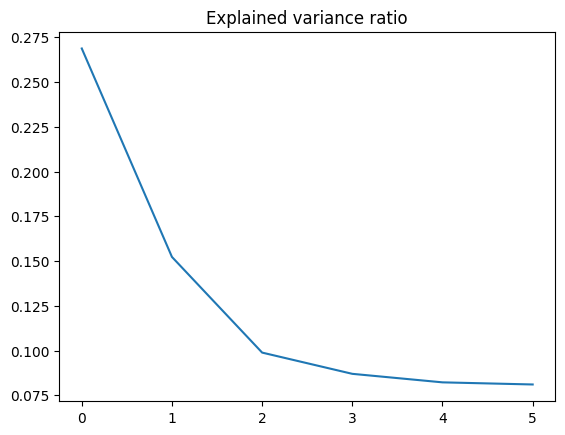

In [13]:
# Wizualizacja
plt.plot(pca.explained_variance_ratio_[0:6])
plt.title('Explained variance ratio')
plt.show()

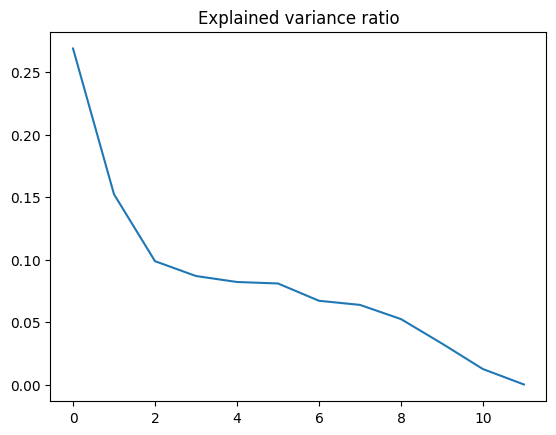

In [14]:
# Wizualizacja
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance ratio')
plt.show()

In [15]:
sum(pca.explained_variance_ratio_)

1.0

In [16]:
pca.explained_variance_ratio_

array([0.26874327, 0.15229012, 0.09885054, 0.08698455, 0.08222548,
       0.08103954, 0.06721867, 0.06393312, 0.05260258, 0.03307317,
       0.01267401, 0.00036495])

In [17]:
# Zbiór PCA
df_pca = pd.DataFrame(pca.transform(df_scaled[x]))

In [18]:
# Describe
df_pca.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.796,1.352,1.089,1.022,0.993,0.986,0.898,0.876,0.795,0.630,0.390,0.066
min,-4.506,-4.274,-3.564,-2.945,-2.502,-2.704,-3.142,-2.986,-2.686,-1.958,-1.463,-0.477
25%,-1.503,-0.969,-0.758,-0.697,-0.720,-0.721,-0.625,-0.586,-0.535,-0.432,-0.263,-0.023
50%,0.040,-0.078,-0.016,0.001,0.003,-0.013,0.003,-0.010,0.008,0.000,0.005,0.005
75%,1.439,0.916,0.771,0.711,0.704,0.734,0.616,0.599,0.558,0.423,0.260,0.032
max,4.531,5.136,3.314,3.281,2.680,2.661,3.163,2.731,2.722,2.310,1.524,0.383


In [19]:
# Korelacja
df_pca.corr()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
1,-0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
2,-0.000,-0.000,1.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
3,0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
4,0.000,0.000,0.000,-0.000,1.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000
5,-0.000,0.000,-0.000,-0.000,0.000,1.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
6,-0.000,0.000,-0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,-0.000,-0.000,0.000
7,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,1.000,0.000,0.000,-0.000,-0.000
8,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000
9,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,1.000,-0.000,0.000


In [20]:
# train/test split
train_x, test_x, train_y, test_y = train_test_split(df_scaled.drop('Age (years)', axis=1), df[y], random_state=123)

In [21]:
# train/test dla PCA
train_x_pca = df_pca.loc[train_x.index,[0,1,2,3]]
test_x_pca = df_pca.loc[test_x.index,[0,1,2,3]]

In [22]:
# model ze zmiennymi PCA
model_pca = DecisionTreeRegressor(max_depth=20, min_samples_split=20).fit(train_x_pca, train_y)

In [23]:
# model ze starndardowymi zmiennymi
model_std = DecisionTreeRegressor(max_depth=20, min_samples_split=20).fit(train_x, train_y)

In [24]:
# predykcje
pred_test_pca = model_pca.predict(test_x_pca)
pred_test_std = model_std.predict(test_x)

In [25]:
# model std r2
r2_score(test_y,pred_test_std)

0.8808606223451507

In [26]:
# model pca r2
r2_score(test_y,pred_test_pca)

0.8075368876532115